In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl 
%matplotlib inline

In [23]:
df = pd.read_csv(r'C:\Users\SYS\Downloads\Iris.csv')


In [24]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
df.shape

(150, 6)

In [30]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
df.duplicated().sum()

0

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


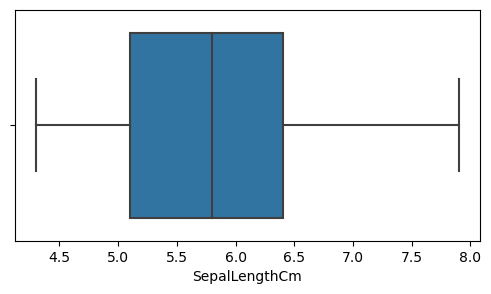

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


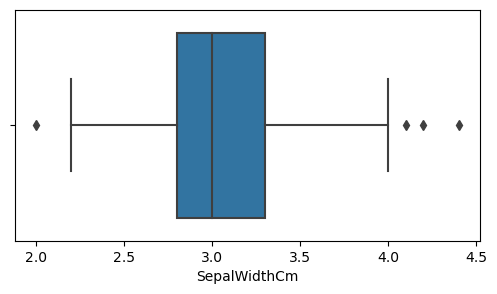

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


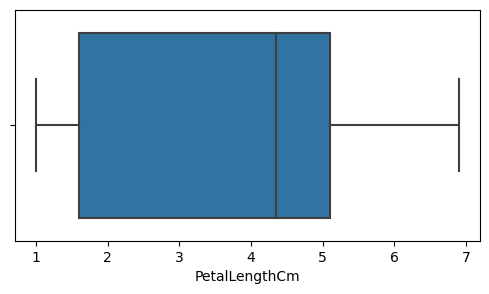

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


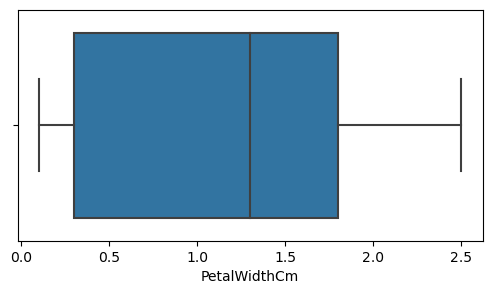

In [45]:
for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

In [46]:
q1,q3=np.percentile(df['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
df['SepalWidthCm']=df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence
                                           else lower_fence if x<lower_fence else x)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

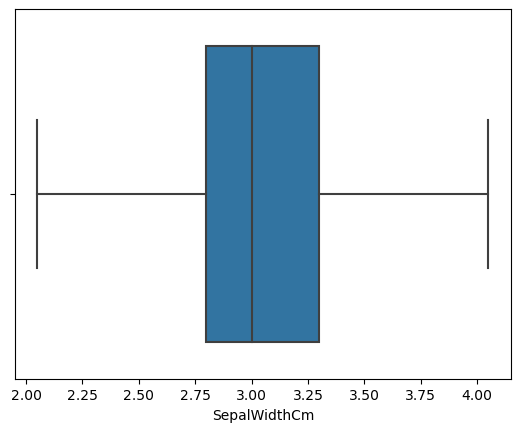

In [48]:
sns.boxplot(df['SepalWidthCm'])

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


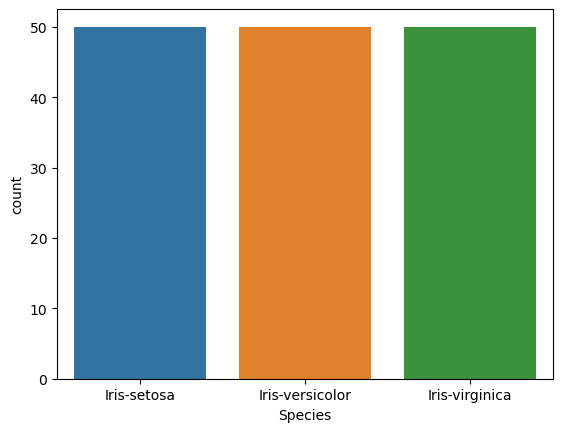

In [55]:
print(df.Species.value_counts())
sns.countplot(df.Species);

In [56]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

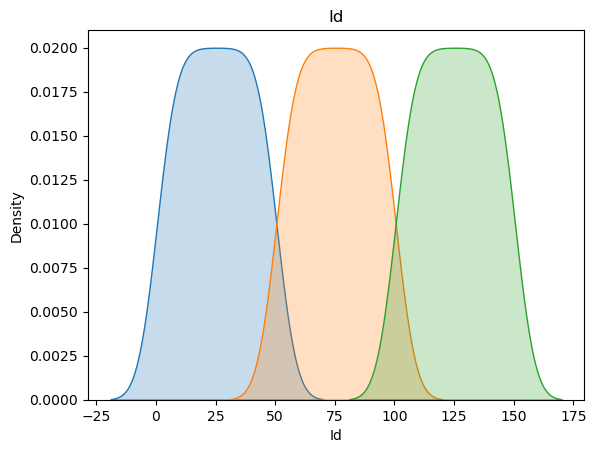

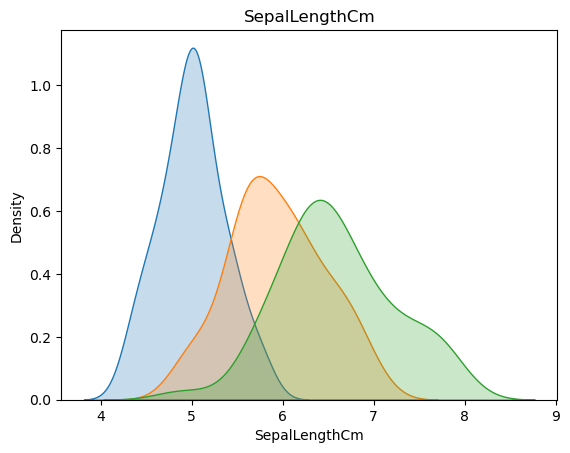

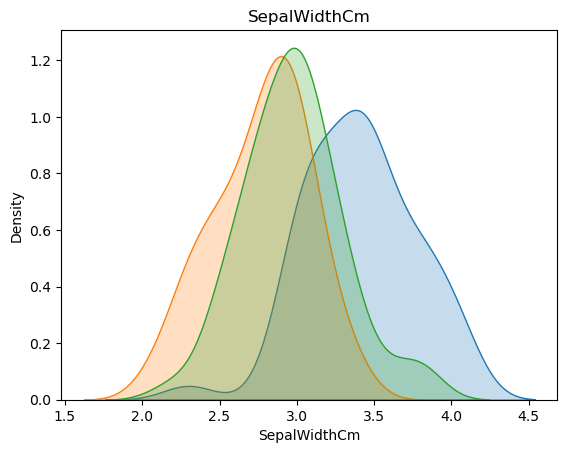

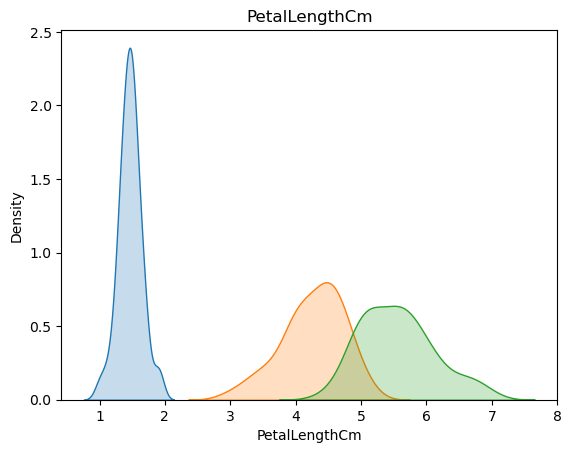

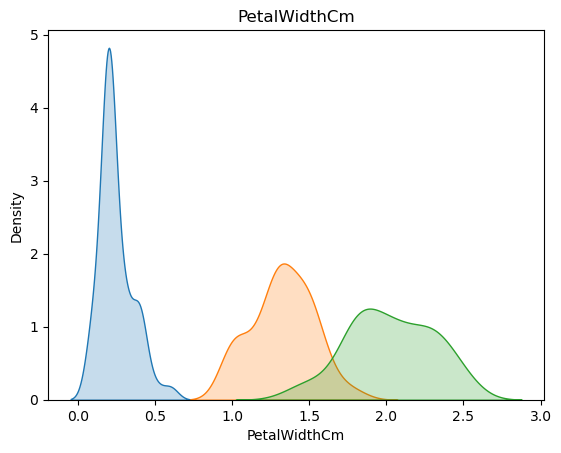

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

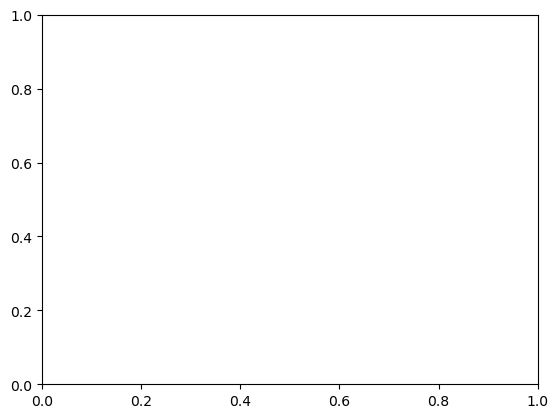

In [103]:
for i in df.columns[:-1]:
    
    sns.kdeplot(data = df.loc[df.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = df.loc[df.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data= df.loc[df.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show()

In [101]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,Species_encoded
Id,1.000000,0.716676,-0.397267,0.882747,0.899759,-0.196828,0.471415
SepalLengthCm,0.716676,1.000000,-0.110343,0.871754,0.817954,-0.148614,0.322522
SepalWidthCm,-0.397267,-0.110343,1.000000,-0.419823,-0.355582,0.016967,0.196560
PetalLengthCm,0.882747,0.871754,-0.419823,1.000000,0.962757,-0.158713,0.299942
PetalWidthCm,0.899759,0.817954,-0.355582,0.962757,1.000000,-0.169338,0.375715
cluster,-0.196828,-0.148614,0.016967,-0.158713,-0.169338,1.000000,-0.228938
Species_encoded,0.471415,0.322522,0.196560,0.299942,0.375715,-0.228938,1.000000


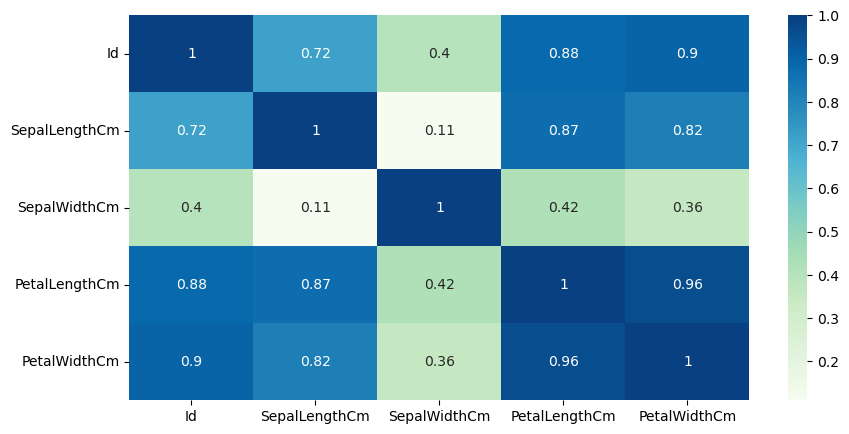

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()),cmap='GnBu',annot=True);

In [72]:
from sklearn.cluster import KMeans

In [74]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [75]:
df['cluster']=kmeans.labels_
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,4
146,147,6.3,2.5,5.0,1.9,Iris-virginica,4
147,148,6.5,3.0,5.2,2.0,Iris-virginica,4
148,149,6.2,3.4,5.4,2.3,Iris-virginica,4


In [76]:
display(df['cluster'].value_counts(),df['Species'].value_counts())

3    20
6    20
0    19
4    19
1    18
7    18
2    18
5    18
Name: cluster, dtype: int64

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [77]:
df.loc[df['Species']=='Iris-setosa']['cluster'].value_counts()

3    20
6    20
1    10
Name: cluster, dtype: int64

In [78]:
df.loc[df['Species']=='Iris-versicolor']['cluster'].value_counts()

7    18
2    18
1     8
5     6
Name: cluster, dtype: int64

In [79]:
df.loc[df['Species']=='Iris-virginica']['cluster'].value_counts()

0    19
4    19
5    12
Name: cluster, dtype: int64

In [81]:
df['Species_encoded']=df['Species'].apply(lambda x:1 if x=='Iris-setosa'else 2 if x=='Iris-virginica'else 0)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,4,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,4,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,4,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,4,2


In [13]:
# Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

NameError: name 'y_kmeans' is not defined

<Figure size 1000x1000 with 0 Axes>

In [82]:
from sklearn.metrics import classification_report 
print(classification_report(df['Species_encoded'],df['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.56      0.20      0.29        50
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.07       150
   macro avg       0.07      0.03      0.04       150
weighted avg       0.19      0.07      0.10       150



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


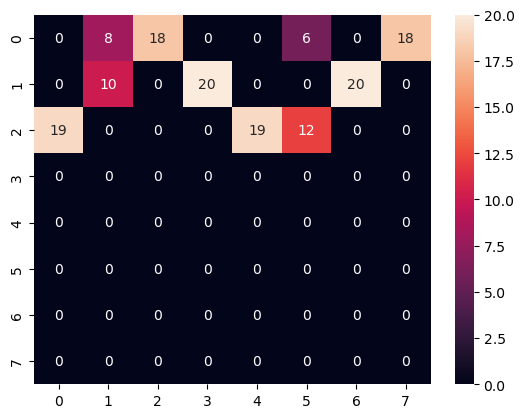

In [88]:
from sklearn.metrics import confusion_matrix 
sns.heatmap(confusion_matrix(df['Species_encoded'],df['cluster']),annot=True);

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


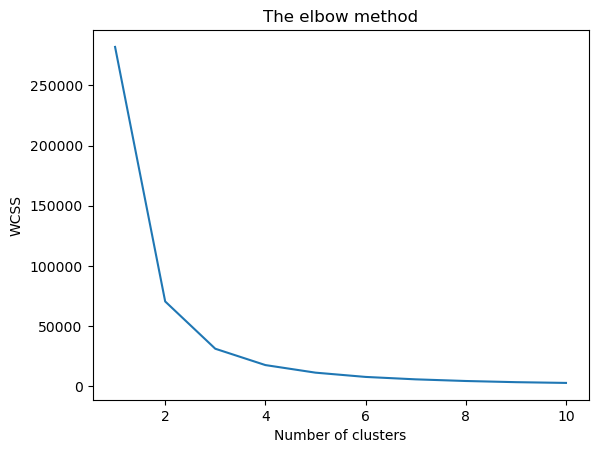

In [109]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()